Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5097 - accuracy: 0.4492 - val_loss: 1.2816 - val_accuracy: 0.5400
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1464 - accuracy: 0.5951 - val_loss: 1.0802 - val_accuracy: 0.6155
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0035 - accuracy: 0.6451 - val_loss: 0.9896 - val_accuracy: 0.6532
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9070 - accuracy: 0.6810 - val_loss: 0.9413 - val_accuracy: 0.6696
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8368 - accuracy: 0.7067 - val_loss: 0.8876 - val_accuracy: 0.6921
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7804 - accuracy: 0.7250 - val_loss: 0.9031 - val_accuracy: 0.6855
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7289 - accuracy: 0.7434 - val_loss: 0.8789 -

AttributeError: Line2D.set() got an unexpected keyword argument 'labels'

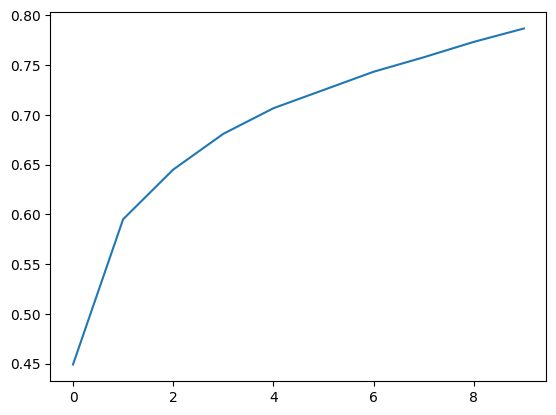

In [6]:
#Importación de las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

#Cargar y preprocesar el conjunto de datos CIFAR10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images /225.0, test_images/ 255.0

#Contstruir la arquitectura de la red neuronal convolucional

model= models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)), #Capa 1
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), #Capa 2
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), #Capa 3
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


#Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


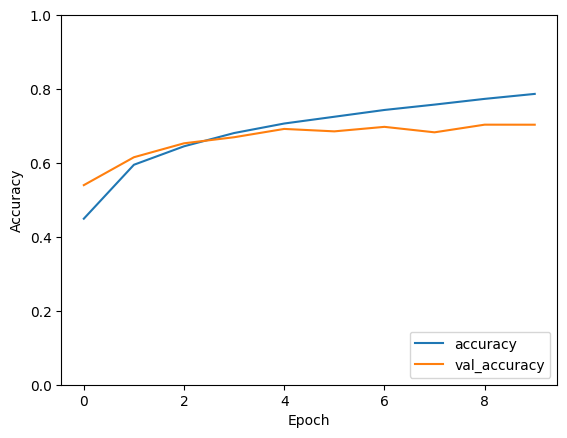

In [9]:

#Visualizar los resultados
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()